<a href="https://colab.research.google.com/github/segu2003/Segu/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Target-1:***

***Dataset Information***

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

***Importing Modules***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings .filterwarnings(action='ignore')

***Loading the data***

In [ ]:
credit_card_data=pd.read_excel('/content/drive/MyDrive/project/creditcard.xlsx')

In [ ]:
credit_card_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


***Dataset Information***

In [ ]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  int64  
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

***Describing the Data***

In [ ]:
credit_card_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.205498e-16,-2.406306e-15,...,1.656562e-16,-3.568593e-16,2.610582e-16,4.473066e-15,5.213180e-16,1.683537e-15,-3.659966e-16,-1.223710e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


***Missing Values***

There are no missing values in the dataset,Because in describing the data the count column contains all variables are same .

In [ ]:
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

***Distribution of legit transactions and fraudlent transactions***

The class contains number of legit transactions and fraudlent transactions using value_counts function

In [ ]:
credit_card_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

As we saw in above details the legist transactions are 284315 and farudlent transactions are 492. In the below graph the fraudlent transactions very much low compared to the legit transactions.



Dataset is highly unbalanced

*   0 ------> Normal Transaction
*   1 ------> Fraudlent Tansaction





***Graph***

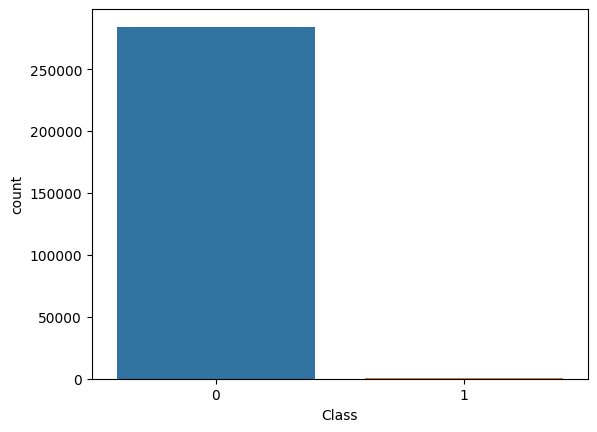

In [ ]:
sns.countplot(x='Class',data=credit_card_data)
plt.show()

***Separating the data for analysis***

In [ ]:
legit=credit_card_data[credit_card_data.Class ==0]
fraudlent=credit_card_data[credit_card_data.Class ==1]

In [ ]:
legit.shape

(284315, 31)

In [ ]:
fraudlent.shape

(492, 31)

***Statical measures***

In [ ]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
fraudlent.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Now compare the values for both transactions

In [ ]:
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


***Under Sampling***

Undersampling is a technique to balance uneven datasets by keeping all of the data in the minority class and decreasing the size of the majority class. It is one of several techniques data scientists can use to extract more accurate information from originally imbalanced datasets.



In this case, we will use the undersampling technique to obtain a uniform division between fraud and legit transactions. This will make the training set small, but with enough data to generate a good classifier.

In [ ]:
legit_sample=legit.sample(n=492)

***Concatenating two Dataframes***

In [ ]:
new_data=pd.concat([legit_sample,fraudlent], axis=0)

In [ ]:
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
29959,35714,-0.714172,0.698542,1.621693,-1.129235,-0.344507,-0.279232,0.516535,0.057506,-0.150421,...,-0.044478,-0.347983,-0.016664,0.015419,-0.630877,0.598913,-0.221254,0.095570,44.06,0
251797,155505,1.987752,-0.404350,-0.862414,0.753974,-0.423668,-0.064805,-0.769267,0.136383,1.729364,...,0.117853,0.720794,0.038619,0.641467,0.006381,0.748253,-0.007092,-0.025121,5.47,0
160606,113488,-0.522806,-0.093229,1.221074,-0.635445,0.281671,-0.874849,0.035567,-0.023555,0.837469,...,0.255164,0.846779,-0.025295,0.074807,0.130638,-0.337622,-0.140945,0.020364,4.99,0
9193,13161,1.048526,0.325179,1.775352,2.944633,-0.679932,0.490815,-0.694539,0.186424,1.331481,...,-0.180592,-0.090281,0.117851,0.347802,0.163906,-0.074340,0.033263,0.031081,7.70,0
279202,168704,-1.417668,0.056666,2.760027,0.551785,-1.471575,2.525317,-2.293458,-1.900349,-0.247726,...,-1.465320,0.688690,-0.510014,0.697665,0.197121,-0.249469,0.133030,0.119416,100.00,0


In [ ]:
new_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [ ]:
new_data['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [ ]:
new_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,96334.426829,0.017316,-0.020825,0.025279,-0.055193,0.072696,0.026225,0.016572,-0.084307,0.026578,...,-0.002897,0.042184,-0.048504,0.007245,0.035695,0.011956,0.018797,0.000070,-0.020923,85.221768
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


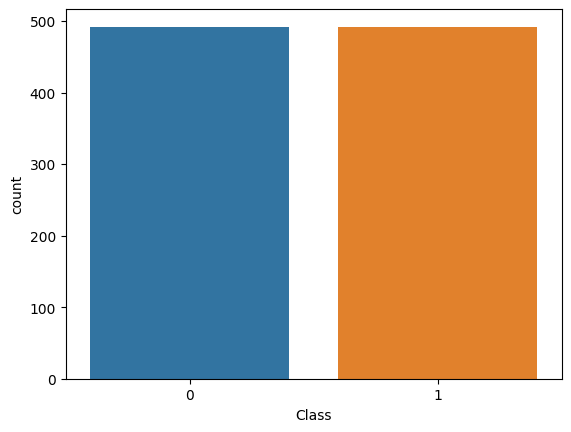

In [ ]:
sns.countplot(x='Class',data=new_data)
plt.show()

***Separating dependent and independent variables***

In [ ]:
X=new_data.drop(columns='Class')
Y=new_data['Class']

In [ ]:
print(X)

          Time        V1        V2        V3        V4        V5        V6  \
29959    35714 -0.714172  0.698542  1.621693 -1.129235 -0.344507 -0.279232   
251797  155505  1.987752 -0.404350 -0.862414  0.753974 -0.423668 -0.064805   
160606  113488 -0.522806 -0.093229  1.221074 -0.635445  0.281671 -0.874849   
9193     13161  1.048526  0.325179  1.775352  2.944633 -0.679932  0.490815   
279202  168704 -1.417668  0.056666  2.760027  0.551785 -1.471575  2.525317   
...        ...       ...       ...       ...       ...       ...       ...   
279863  169142 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  ...       V20       V21  

In [ ]:
print(Y)

29959     0
251797    0
160606    0
9193      0
279202    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


***Scaling the dataset***

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

***Spliting the data into Training data and Testing data***

In [ ]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,Y_train,Y_test=tts(scaled_X,Y,train_size=0.80,stratify=Y)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((787, 30), (197, 30), (787,), (197,))

***Target-2:***

***Model Building using Logistic Regression***

In [ ]:
from sklearn.linear_model import LogisticRegression as lr
classifier=lr(class_weight='balanced')

***Training the model on prepared data***

In [ ]:
classifier.fit(X_train,Y_train)
predicted_values=classifier.predict(X_train)
predicted_probabilities=classifier.predict_proba(X_train)

In [ ]:
predicted_values

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [ ]:
predicted_probabilities,predicted_probabilities.shape

(array([[7.46984600e-01, 2.53015400e-01],
        [2.00205557e-07, 9.99999800e-01],
        [2.63261649e-05, 9.99973674e-01],
        ...,
        [8.58842707e-01, 1.41157293e-01],
        [6.34612363e-11, 1.00000000e+00],
        [9.63973689e-01, 3.60263115e-02]]),
 (787, 2))

In [ ]:
accuracy_score=classifier.score(X_train, Y_train)

In [ ]:
print('Accuracy on Training data',accuracy_score)

Accuracy on Training data 0.9479034307496823


In [ ]:
classifier.fit(X_train,Y_train)
predicted_values1=classifier.predict(X_test)
predicted_probabilities1=classifier.predict_proba(X_test)

In [ ]:
predicted_values1

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1])

In [ ]:
predicted_probabilities1,predicted_probabilities1.shape

(array([[8.89527522e-03, 9.91104725e-01],
        [8.53404248e-01, 1.46595752e-01],
        [3.83493674e-03, 9.96165063e-01],
        [3.16561699e-03, 9.96834383e-01],
        [9.92158850e-01, 7.84114955e-03],
        [7.96533564e-01, 2.03466436e-01],
        [8.15631784e-10, 9.99999999e-01],
        [9.68994206e-01, 3.10057943e-02],
        [9.25707756e-01, 7.42922438e-02],
        [4.23058921e-08, 9.99999958e-01],
        [9.74350954e-01, 2.56490458e-02],
        [8.65803679e-01, 1.34196321e-01],
        [9.24702925e-01, 7.52970753e-02],
        [7.83772828e-01, 2.16227172e-01],
        [2.41869392e-01, 7.58130608e-01],
        [9.61009242e-01, 3.89907576e-02],
        [9.64675845e-01, 3.53241549e-02],
        [8.37223056e-01, 1.62776944e-01],
        [9.37417288e-01, 6.25827117e-02],
        [4.65151165e-03, 9.95348488e-01],
        [1.90738827e-04, 9.99809261e-01],
        [9.46095393e-01, 5.39046072e-02],
        [4.58844347e-02, 9.54115565e-01],
        [1.36136336e-03, 9.9863863

In [ ]:
accuracy_score1=classifier.score(X_test,Y_test)

In [ ]:
print('Accuracy on Testing data:',accuracy_score1)

Accuracy on Testing data: 0.9593908629441624


***Evaluating model perfomance using accuarcy and recall***

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
Recall=recall_score(Y_train,predicted_values)
Recall

0.9111675126903553

In [ ]:
Recall1=recall_score(Y_test,predicted_values1)
Recall1

0.9387755102040817

In [ ]:
input_data=(5,166,72,19,175,8,0.345,23,43,53,23,65,86,243,76,64,35,354,14,564,4.34,67.454,432.456,234,4747,31,5436,56.45,5436,132)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=classifier.predict(input_data_reshaped)
print(prediction)
if (prediction[0]==0):
  print('no fraud detection')
else:
  print('fraud detection')

[1]
fraud detection


***Target-3***

***Fine Tune model parameters***

***Build Logistic Regression with Hyperparameter Tuning***

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = [
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

***Import Grid Search***

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
clf = GridSearchCV(logModel,  param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [ ]:
best_clf = clf.fit(X,Y)

In [ ]:
print (f'Accuracy - : {best_clf.score(X,Y):.3f}')

Accuracy - : 0.987


***Combining Multiple models***

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score


In [ ]:
X, Y= load_iris(return_X_y=True)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)


In [ ]:
random_forest_model.fit(X_train, Y_train)
adaboost_model.fit(X_train, Y_train)

In [ ]:
random_forest_predictions = random_forest_model.predict(X_test)
adaboost_predictions = adaboost_model.predict(X_test)


In [ ]:
ensemble_predictions = (random_forest_predictions + adaboost_predictions) >= 1


In [ ]:
ensemble_accuracy = accuracy_score(Y_test, ensemble_predictions)
print(f"Ensemble Accuracy: {ensemble_accuracy}")


Ensemble Accuracy: 0.9289340101522843


***Deploying real-time Fraud detection***

In [ ]:
import pickle
filename='trained_model.sav'

In [ ]:
pickle.dump(classifier, open(filename,'wb'))

In [ ]:
#loading the saved model
loaded_model=pickle.load(open('trained_model.sav', 'rb'))

In [ ]:
input_data=(5,166,72,19,175,8,0.345,23,43,53,23,65,86,243,76,64,35,354,14,564,4.34,67.454,432.456,234,4747,31,5436,56.45,5436,132)

#changing the input data to numpy array
input_data_as_numpy_array=np.asarray(input_data)
#reshape the array as we are predicting for on instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
  print('no fraud detection')
else:
  print('fraud detection')

[1]
fraud detection
